<a href="https://colab.research.google.com/github/juanicolombo97/TP1-OrganizacionDatos/blob/main/TP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP1

## Datos Grupo

### Link Github Repository

[Github](https://github.com/juanicolombo97/TP1-OrganizacionDatos)

### Juan Ignacio Colombo


Padron: 103471


Mail: jcolombo@fi.uba.ar

## Imports

In [2]:
# Import pandas.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# Import files from drive.

# from google.colab import drive
# drive.mount('/content/gdrive')

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [4]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [5]:
dataset_labels = drive.CreateFile({'id': '1BFMOae6_mh0FAADOEAmMgKEyxVLnyLx-'})
dataset_labels.GetContentFile('labels.csv')

In [6]:
dataset_values = drive.CreateFile({'id': '1H-6GzuPgEkHrJuA0ZN932tyAynasX231'})
dataset_values.GetContentFile('values.csv')

In [7]:
train_labels_dataset = pd.read_csv("labels.csv")
train_values_dataset = pd.read_csv("values.csv")

## Analisis Exploratorio

### Analisis inicial.


In [8]:
train_labels_dataset.head(5)

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [9]:
train_values_dataset.head(5)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [10]:
# Analizo segun año.
train_values_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

### Manejo Nulos y Nan.

In [11]:
cantidad_edificios = train_values_dataset["building_id"].count()
cantidad_edificios

260601

In [12]:
# Cantidad de nulos por columna.
train_values_dataset.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

In [13]:
# Cantidad de Nan por columna.
train_values_dataset.isna().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

### Porcentaje datos validos.

In [14]:
datos_validos = train_values_dataset.count().reset_index()
datos_validos["Porcentaje_datos_validos"] = (cantidad_edificios / datos_validos[0]) * 100
datos_validos_por_columna = datos_validos[["index","Porcentaje_datos_validos"]]
datos_validos_por_columna

,index,Porcentaje_datos_validos
0,building_id,100.0
1,geo_level_1_id,100.0
2,geo_level_2_id,100.0
3,geo_level_3_id,100.0
4,count_floors_pre_eq,100.0
5,age,100.0
6,area_percentage,100.0
7,height_percentage,100.0
8,land_surface_condition,100.0
9,foundation_type,100.0


### Incoherencias en las variables

#### Incoherencia en los pisos.

In [97]:
cantidad_edificios_pisos_incoherentes = train_values_dataset['count_floors_pre_eq'] > train_values_dataset['height_percentage']
cantidad_pisos_incorrrectos = cantidad_edificios_pisos_incoherentes.sum()
cantidad_pisos_incorrrectos

20

### Analisis Segun Edad

#### Filtrado datos y merge.

In [15]:
datos_edad = train_values_dataset[["building_id", "age"]]
datos_edad_merged = pd.merge(left=datos_edad, right=train_labels_dataset, how="inner", on="building_id")
datos_edad_filtrados = datos_edad_merged[["damage_grade", "age"]]
datos_edad_filtrados.head(1)

,damage_grade,age
0,3,30


#### Edades comparadas a promedio segun damage_grade.

In [16]:
datos_promedio = datos_edad_filtrados
datos_promedio["Supera_Promedio_Edad"] = datos_promedio["age"] > datos_promedio["age"].mean()
datos_promedio["Debajo_Promedio_Edad"] = datos_promedio["age"] <= datos_promedio["age"].mean()
datos_promedio_final = datos_promedio.groupby("damage_grade").agg({"Supera_Promedio_Edad": "count", "Debajo_Promedio_Edad": "count"}).reset_index()
datos_promedio_final

,damage_grade,Supera_Promedio_Edad,Debajo_Promedio_Edad
0,1,25124,25124
1,2,148259,148259
2,3,87218,87218


#### Rango edades segun damage_grade.

In [17]:
# Obtengo los rangos de edad segun el damage grade, para edificios entre 0 a 100 anios.
datos_rangos = datos_edad_filtrados
datos_rangos["Damage_3"] = datos_rangos["damage_grade"] == 3
datos_rangos["Damage_2"] = datos_rangos["damage_grade"] == 2
datos_rangos["Damage_1"] = datos_rangos["damage_grade"] == 1
datos_rangos_final = datos_rangos.groupby("age").agg({"Damage_3" : "sum", "Damage_2" : "sum", "Damage_1" : "sum"}).reset_index()


##### Rangos menores a 100 anios.

In [18]:
datos_rangos_edad_menor_100 = datos_rangos_final[datos_rangos_final["age"] <= 100]
datos_rangos_edad_menor_100

,age,Damage_3,Damage_2,Damage_1
0,0,6107,12721,7213
1,5,9077,19030,5590
2,10,12166,22370,4360
3,15,12365,20767,2878
4,20,11625,18603,1954
5,25,9162,14073,1131
6,30,6944,10444,640
7,35,4112,6246,352
8,40,4188,6088,283
9,45,1789,2802,120


##### Rangos mayores a 100 anios.

In [19]:
datos_rangos_edad_mayor_100 = datos_rangos_final[datos_rangos_final["age"] > 100]
datos_rangos_edad_mayor_100

,age,Damage_3,Damage_2,Damage_1
21,105,32,56,1
22,110,35,64,1
23,115,10,10,1
24,120,80,98,2
25,125,11,26,0
26,130,6,3,0
27,135,0,4,1
28,140,1,8,0
29,145,0,3,0
30,150,44,97,1


In [20]:
datos_edad_filtrados.head()

,damage_grade,age,Supera_Promedio_Edad,Debajo_Promedio_Edad,Damage_3,Damage_2,Damage_1
0,3,30,True,False,True,False,False
1,2,10,False,True,False,True,False
2,3,10,False,True,True,False,False
3,2,10,False,True,False,True,False
4,3,30,True,False,True,False,False


#### Analisis sobre area_percentage.

In [57]:
area_segun_edades = train_values_dataset[['building_id', 'age', 'area_percentage']]
area_segun_edades_joineado = pd.merge(left=area_segun_edades, right=train_labels_dataset, on="building_id")
area_edad_segun_damage = area_segun_edades_joineado.groupby('damage_grade').agg({"area_percentage" : 'mean', "age" : "mean"})
area_edad_segun_damage

,area_percentage,age
damage_grade,,
1,9.716009,17.320490
2,8.034049,27.342118
3,7.501743,27.817423


In [72]:
area_segun_altura = train_values_dataset[['building_id', 'age', 'area_percentage', 'height_percentage']]
area_segun_altura_joineado = pd.merge(left=area_segun_altura, right=train_labels_dataset, on='building_id', how="left")[['area_percentage', 'height_percentage', 'damage_grade']]
area_segun_altura_joineado.head(5)

,area_percentage,height_percentage,damage_grade
0,6,5,3
1,8,7,2
2,5,5,3
3,6,5,2
4,8,9,3


### Analisis segun cantidad pisos y altura.

In [92]:
pisos_y_altura = train_values_dataset[['building_id','count_floors_pre_eq', 'height_percentage']]
pisos_y_altura =  pd.merge(left=pisos_y_altura, right=train_labels_dataset, on='building_id', how="left")[['count_floors_pre_eq', 'height_percentage', 'damage_grade']]
pisos_y_altura_filtrado = pisos_y_altura[pisos_y_altura['count_floors_pre_eq'] < pisos_y_altura['height_percentage']]
pisos_y_altura_filtrado['relacion'] = pisos_y_altura_filtrado['height_percentage'] / pisos_y_altura_filtrado['count_floors_pre_eq']
pisos_y_altura_filtrado.to_csv('pisos_altura.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [98]:
pisos_y_altura

,count_floors_pre_eq,height_percentage,damage_grade
0,2,5,3
1,2,7,2
2,2,5,3
3,2,5,2
4,3,9,3
...,...,...,...
260596,1,3,2
260597,2,5,3
260598,3,7,3
260599,2,6,2


### Analisis sobre casas.

#### Casas Barro


In [21]:
casas_barro = train_values_dataset.loc[train_values_dataset['has_superstructure_adobe_mud'] == 1, ['building_id','has_superstructure_adobe_mud']]

In [22]:
danio_casas_barro = pd.merge(casas_barro, train_labels_dataset, how='inner', on= 'building_id')

In [23]:
#nivel de daño para las viviendas construidas con barro
danio_casas_barro = danio_casas_barro['damage_grade'].value_counts().reset_index()\
.rename(columns = {'index': 'damage_grade', 'damage_grade': 'cantidad_casas_barro'})

danio_casas_barro

,damage_grade,cantidad_casas_barro
0,2,13902
1,3,8605
2,1,594


#### Casas Cemento

In [24]:
casas_cemento = train_values_dataset.loc[train_values_dataset['has_superstructure_cement_mortar_brick'] == 1, ['building_id','has_superstructure_cement_mortar_brick']]

In [25]:
danio_casas_cemento = pd.merge(casas_cemento, train_labels_dataset, how='inner', on= 'building_id')\
.loc[:, ['damage_grade', 'has_superstructure_cement_mortar_brick']].groupby('damage_grade').sum().reset_index()\
.rename(columns = {'has_superstructure_cement_mortar_brick': 'cantidad_casas_cemento'})
danio_casas_cemento

,damage_grade,cantidad_casas_cemento
0,1,7105
1,2,11421
2,3,1089


#### Casas reforzadas

In [26]:
casas_reforzadas = train_values_dataset.loc[train_values_dataset['has_superstructure_rc_engineered'] == 1,['building_id','has_superstructure_rc_engineered']]

In [27]:
danio_casas_reforzadas = pd.merge(casas_reforzadas, train_labels_dataset, how='inner', on= 'building_id')\
.loc[:, ['damage_grade', 'has_superstructure_rc_engineered']].groupby('damage_grade').sum().reset_index()\
.rename(columns = {'has_superstructure_rc_engineered': 'cantidad_casas_reforzadas'})
danio_casas_reforzadas

,damage_grade,cantidad_casas_reforzadas
0,1,2656
1,2,1402
2,3,75


#### Casas combinadas

Text(0.5, 1.0, 'cantidad de casas con distintos materiales y su daño')

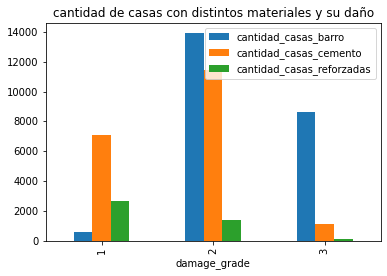

In [28]:
danio_casas_por_material = danio_casas_barro.merge(danio_casas_cemento, how= 'inner').merge(danio_casas_reforzadas, how = 'inner')

plot = danio_casas_por_material.set_index('damage_grade').sort_index().plot(kind = 'bar')
plot.set_title('cantidad de casas con distintos materiales y su daño')
